In [171]:
import os
import itertools
import numpy as np
import pandas as pd

In [172]:
cnt = 0
result = None
for file_name in os.listdir('./finance_data/data'):
    if file_name.endswith('.csv'):
        stock_df = pd.read_csv('./finance_data/data/'+file_name)
        if len(stock_df)==765:
            name = file_name.split('.csv')[0]
            reqd_df = pd.DataFrame({'Date': stock_df.Date, name : np.log(1 + stock_df.Close.pct_change())})
            reqd_df = reqd_df.drop(0)
            reqd_df['Date'] = pd.to_datetime(reqd_df['Date'])
            if cnt==0:
                result = reqd_df
                cnt+=1
            else:
                temp = result
                result = pd.merge(result, reqd_df, on='Date')
                if len(result)!=len(reqd_df):
                    result = temp
                else:
                    cnt+=1

In [173]:
def correlation(col_1, col_2):
    col_1 = col_1.values
    col_2 = col_2.values
    num = np.mean(col_1 * col_2) - (np.mean(col_1) * np.mean(col_2))
    deno_1 = np.mean(np.power(col_1,2)) - np.power(np.mean(col_1),2)
    deno_2 = np.mean(np.power(col_2,2)) - np.power(np.mean(col_2),2)
    deno = np.sqrt(deno_1 * deno_2)
    return num/deno

In [174]:
result = result.drop('Date',axis=1)
# result.columns = np.arange(1, len(result.columns)+1)
alt_columns = np.arange(1, len(result.columns)+1)
rho_matrix = np.zeros(shape=[cnt,cnt]) # only use upper triangular matrix
column_perm = list(itertools.combinations(result.columns, 2))
alt_column_perm = list(itertools.combinations(alt_columns, 2))
edge_dict = {'Stock 1':[], 'Stock 2':[], 'Edge Weight':[]}
for index, col in enumerate(column_perm):
    edge_dict['Stock 1'].append(col[0])
#     edge_dict['Stock 1'].append(alt_column_perm[index][0])
    edge_dict['Stock 2'].append(col[1])
#     edge_dict['Stock 2'].append(alt_column_perm[index][1])
    corr = np.sqrt(2 * (1 - correlation(result[col[0]], result[col[1]])))
    edge_dict['Edge Weight'].append(corr)
#     rho_matrix[int(col[0])-1, int(col[1])-1] = corr
    

In [175]:
edge_file = pd.DataFrame(edge_dict)
cols = edge_file.columns.tolist()
cols = ['Stock 1', 'Stock 2', 'Edge Weight']
edge_file = edge_file[cols]

In [176]:
edge_file.head()

,Stock 1,Stock 2,Edge Weight
0,A,AAL,1.189554
1,A,AAP,1.269710
2,A,AAPL,1.373192
3,A,ABBV,1.129386
4,A,ABC,1.248807


In [177]:
edge_file.to_csv('Graph.txt', header=None, index=None, sep=' ', mode='w')

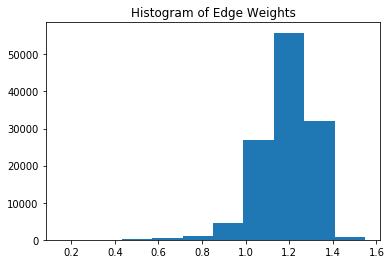

In [190]:
# Q2 A histogram showing the un-normalized distribution of edge weights.
import matplotlib.pyplot as plt
plt.hist(edge_dict['Edge Weight'])
plt.title('Histogram of Edge Weights')
plt.show()